# Case Study 2

카드사기 이상징후 판단

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')

## Gaussian basics

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 500

### 1. 상관관계 없음

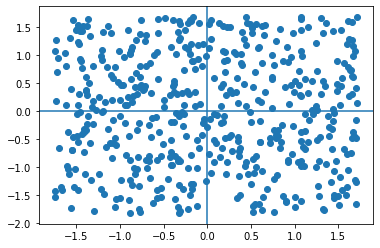

In [3]:
x1 = np.random.rand(N); x2 = np.random.rand(N)
x1 = (x1- np.mean(x1))/np.std(x1); x2 = (x2- np.mean(x2))/np.std(x2)
plt.scatter(x1, x2)
plt.axvline(0); plt.axhline(0)

In [4]:
print(f'평균 벡터:')
np.mean(np.vstack([x1, x2]), axis=1)
print(f'공분산 행렬:')
np.cov(np.vstack([x1, x2]))

평균 벡터:


array([-1.06581410e-17,  3.05533376e-16])

공분산 행렬:


array([[ 1.00200401, -0.02383988],
       [-0.02383988,  1.00200401]])

### 2. 상관관계 있음

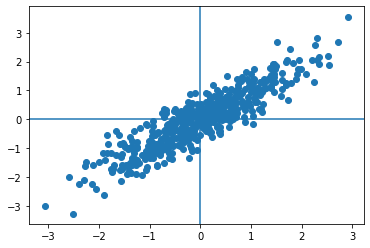

In [5]:
x1 = np.random.normal(0, 1, N); x2 = x1*2 + np.random.normal(0, 1, N)
x1 = (x1- np.mean(x1))/np.std(x1); x2 = (x2- np.mean(x2))/np.std(x2)
plt.scatter(x1, x2)
plt.axvline(0); plt.axhline(0)

In [7]:
print(f'평균 벡터:')
np.mean(np.vstack([x1, x2]), axis=1)
print(f'공분산 행렬:')
np.cov(np.vstack([x1, x2]))

평균 벡터:


array([ 7.10542736e-18, -1.77635684e-17])

공분산 행렬:


array([[1.00200401, 0.89294918],
       [0.89294918, 1.00200401]])

## Multivariate gaussian distribution
* 두 독립변수의 분포는 정규분포이고 negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 
* y의 클래스에 따라 모수가 달라

첫번째 모집단 평균과 :
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}

공분산은
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}

In [8]:
from scipy.stats import norm
rv = norm() # Random variates Class
rv.pdf(1.96) # Probability density function. 평균 0 , 분산 1, Z-distribution

0.058440944333451476

In [11]:
import scipy.stats as stats
np.random.seed(13)

rv0 = stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv0.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()
x0[0:5]
x1[0:5]

array([[-1.87099378, -0.7612922 ],
       [-2.23119126, -1.7818422 ],
       [-3.39960191, -3.65866316],
       [-3.5981157 , -3.55124282],
       [-2.57469024, -4.39055424]])

array([[ 2.55144711,  1.94680218],
       [ 1.58026542,  3.91582847],
       [ 3.08895146,  1.53413986],
       [ 3.5732754 , -0.95220882],
       [ 2.50021539,  3.47271258]])

Text(0.5, 1.0, '데이터의 확률분포')

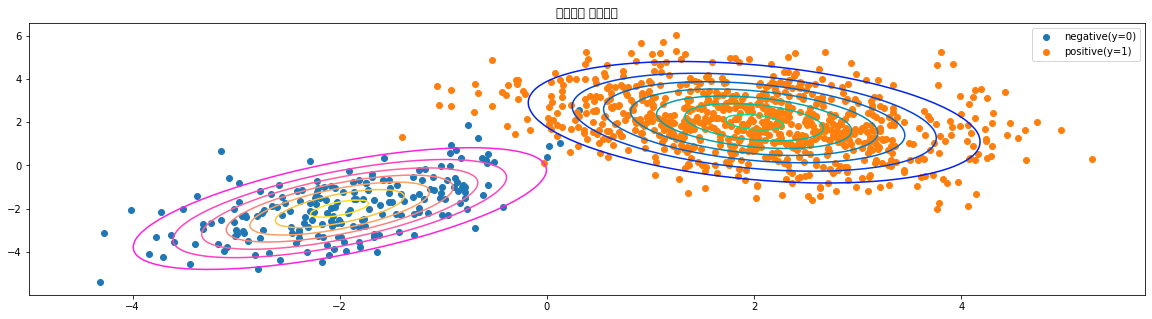

In [12]:
#X = np.vstack([x0, x1]); y = np.hstack([np.zeros(1000), np.ones(5000)])

xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(20,5))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("데이터의 확률분포")

plt.show()

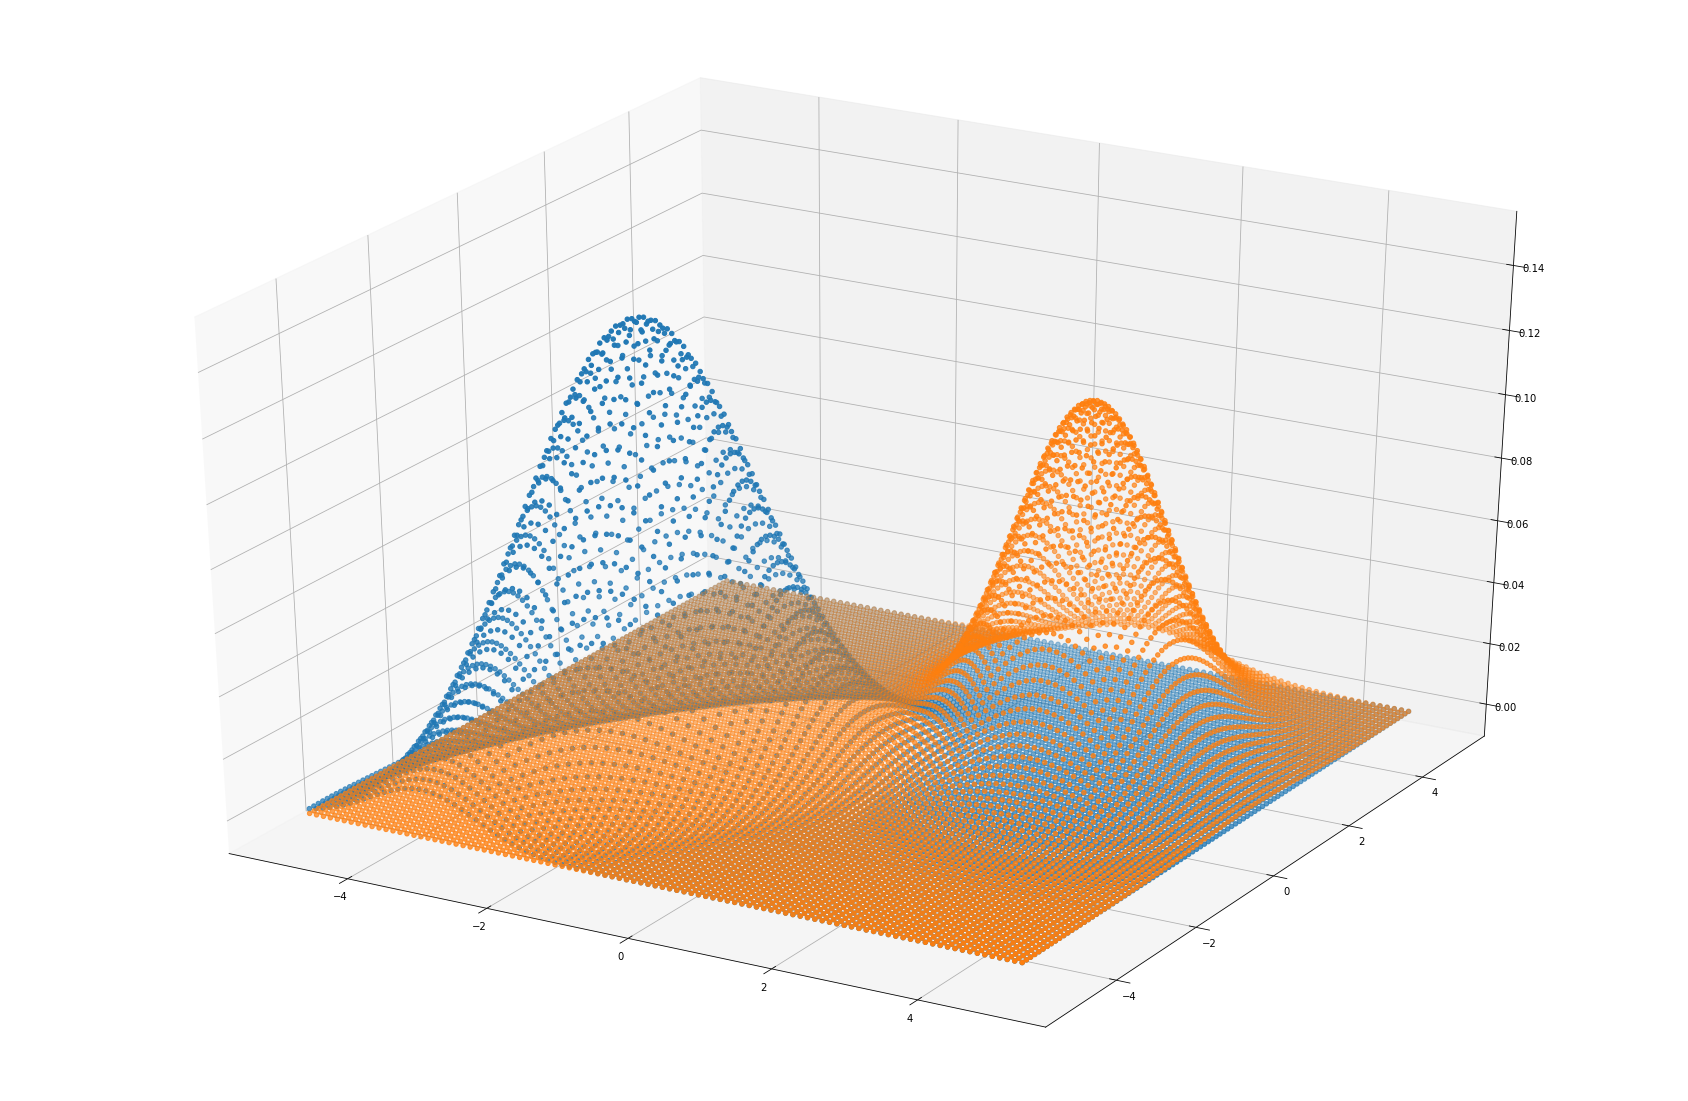

In [10]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')
ax.scatter3D(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
ax.scatter3D(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')

# 1. Anomaly Detection using Gaussian Distribution
- Credit card fraud methods have become increasingly sophisticated with use of latest technology today by criminals. It is not a simple task anymore to identify outliers/Anamolous transactions before hand unless reported by the customer
- Lets get the dataframe for the Credit card transation data 

In [7]:
import pandas as pd
%time df = pd.read_csv('../data/creditcard.csv')
print(df.columns.values)
df.head()

Wall time: 2.7 s
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Two functions which are required to calculate Gaussian Distribution of the normalized variables provided in the dataset (V1, V2 ....V28, Amount )

- 1) Find out mu and Sigma for the dataframe variables passed to this function.
- 2) Calculate Probability Distribution for the each row.
       
Formula:- 
if each example x has N dimensiona(features) then below formula is used to calculate the P value <br>
#### P(x) = p(x1,u1,sigma1^2)p(x2,u2,sigma2^2)p(x3,u3,sigma3^2).....p(xn,un,sigma'N'^2)

## Pickle로 저장하여 빨리 읽는다

In [8]:
df.to_pickle('../output/creditcard.pkl')

In [9]:
%time pd.read_pickle('../output/creditcard.pkl')

Wall time: 39.9 ms


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


파일이 커서 실습을 위해 작은 파일

In [10]:
df = df.sample(frac=0.1, random_state=13)

Multivariates gaussian distribution

In [11]:
df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']]
df.Class.value_counts()
df.Class.value_counts(normalize=True)*100

0    28433
1       48
Name: Class, dtype: int64

0    99.831467
1     0.168533
Name: Class, dtype: float64

In [12]:
df[['V1', 'V2', 'V3', 'V4', 'V5']].cov()

,V1,V2,V3,V4,V5
V1,3.895737,0.079307,-0.009562,-0.036928,0.029294
V2,0.079307,2.838429,0.039748,-0.047533,-0.009825
V3,-0.009562,0.039748,2.331949,0.020781,0.007546
V4,-0.036928,-0.047533,0.020781,2.005020,0.000227
V5,0.029294,-0.009825,0.007546,0.000227,1.911961


In [13]:
from scipy.stats import multivariate_normal

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [14]:
mu, sigma = estimateGaussian(df)
multivariateGaussian(df,mu,sigma)

array([9.12669115e-05, 6.03663269e-03, 6.87971334e-03, ...,
       4.51788878e-03, 2.04350077e-03, 2.90416139e-04])

In [15]:
mu, sigma = estimateGaussian(df)

df['pdf'] =  multivariateGaussian(df,mu,sigma)

### 예측 성능 검증

In [16]:
df.sort_values(by='pdf').head(10)
df[df['Class'] == 1].head(10)

,V1,V2,V3,V4,V5,Class,pdf
58465,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,0,0.000000e+00
229036,-32.058119,-48.060856,-6.939376,10.856608,26.647697,0,0.000000e+00
220090,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,0,0.000000e+00
17480,-30.552380,16.713389,-31.103685,6.534984,-22.105532,1,3.028072e-288
206255,-40.042537,-38.430842,-21.277176,10.527243,-16.296090,0,2.070764e-285
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,1,6.951726e-266
145022,-36.510583,-40.938048,-5.377986,11.474590,11.066946,0,3.221990e-229
15539,-22.561699,13.208904,-24.643819,6.232532,-16.905611,1,5.858210e-213
15166,-18.474868,11.586381,-21.402917,6.038515,-14.451158,1,6.894394e-185
211449,-26.054765,-37.154221,-4.707242,7.258823,14.929359,0,5.879012e-175


,V1,V2,V3,V4,V5,Class,pdf
157868,-1.532810,2.232752,-5.923100,3.386708,-0.153443,1,2.990069e-133
15166,-18.474868,11.586381,-21.402917,6.038515,-14.451158,1,6.894394e-185
86155,-2.756007,0.683821,-1.390169,1.501887,-1.165614,1,4.706965e-137
63421,-8.461845,6.866198,-11.838269,4.194211,-6.923097,1,3.309543e-137
156990,-1.000611,3.346850,-5.534491,6.835802,-0.299803,1,7.616772e-134
226814,-2.405207,2.943823,-7.616654,3.533374,-5.417494,1,1.547797e-132
10891,-12.339603,4.488267,-16.587073,10.107274,-10.420199,1,1.775238e-154
15539,-22.561699,13.208904,-24.643819,6.232532,-16.905611,1,5.858210e-213
45732,-3.843009,3.375110,-5.492893,6.136378,2.797195,1,1.148749e-135
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,1,1.798024e-136


In [17]:
df[df.Class == 0].head()
df[df.Class == 1].head()

,V1,V2,V3,V4,V5,Class,pdf
195245,1.778661,-0.263032,0.919062,4.024988,-0.434436,0,0.000091
81682,-0.360079,0.914427,0.936358,-0.403613,0.738064,0,0.006037
48923,0.987017,-0.383274,0.523013,0.657328,-0.553589,0,0.006880
146316,-0.606329,0.891398,0.942360,-0.666324,0.789097,0,0.005351
161047,1.862303,-0.393318,-0.599153,1.210966,-0.284624,0,0.003942


,V1,V2,V3,V4,V5,Class,pdf
157868,-1.532810,2.232752,-5.923100,3.386708,-0.153443,1,2.990069e-133
15166,-18.474868,11.586381,-21.402917,6.038515,-14.451158,1,6.894394e-185
86155,-2.756007,0.683821,-1.390169,1.501887,-1.165614,1,4.706965e-137
63421,-8.461845,6.866198,-11.838269,4.194211,-6.923097,1,3.309543e-137
156990,-1.000611,3.346850,-5.534491,6.835802,-0.299803,1,7.616772e-134


# 2. sklearn의 EllipticEnvelope API를 이용한 이상치 예측

In [18]:
from sklearn.covariance import EllipticEnvelope

X = df.drop(['Class', 'pdf'], axis=1)
cov = EllipticEnvelope(random_state=0).fit(X)
cov

EllipticEnvelope(random_state=0)

In [19]:
cov.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
df['Ell'] = cov.predict(X)
df

,V1,V2,V3,V4,V5,Class,pdf,Ell
195245,1.778661,-0.263032,0.919062,4.024988,-0.434436,0,0.000091,1
81682,-0.360079,0.914427,0.936358,-0.403613,0.738064,0,0.006037,1
48923,0.987017,-0.383274,0.523013,0.657328,-0.553589,0,0.006880,1
146316,-0.606329,0.891398,0.942360,-0.666324,0.789097,0,0.005351,1
161047,1.862303,-0.393318,-0.599153,1.210966,-0.284624,0,0.003942,1
...,...,...,...,...,...,...,...,...
228700,-1.586173,0.057197,0.215267,1.013724,-0.601267,0,0.005130,1
2465,1.030636,-0.383973,1.314097,0.512020,-1.243026,0,0.003717,1
244325,1.817115,-0.587352,0.043696,0.638256,-0.912152,0,0.004518,1
57436,1.563152,-1.030278,0.312982,-1.768604,-0.981040,0,0.002044,1


In [21]:
df.loc[df['Ell'] == 1, 'Ell'] = 0
df.loc[df['Ell'] == -1, 'Ell'] = 1
df

,V1,V2,V3,V4,V5,Class,pdf,Ell
195245,1.778661,-0.263032,0.919062,4.024988,-0.434436,0,0.000091,0
81682,-0.360079,0.914427,0.936358,-0.403613,0.738064,0,0.006037,0
48923,0.987017,-0.383274,0.523013,0.657328,-0.553589,0,0.006880,0
146316,-0.606329,0.891398,0.942360,-0.666324,0.789097,0,0.005351,0
161047,1.862303,-0.393318,-0.599153,1.210966,-0.284624,0,0.003942,0
...,...,...,...,...,...,...,...,...
228700,-1.586173,0.057197,0.215267,1.013724,-0.601267,0,0.005130,0
2465,1.030636,-0.383973,1.314097,0.512020,-1.243026,0,0.003717,0
244325,1.817115,-0.587352,0.043696,0.638256,-0.912152,0,0.004518,0
57436,1.563152,-1.030278,0.312982,-1.768604,-0.981040,0,0.002044,0


In [22]:
df.shape
df[df['Class'] == df['Ell']]
df[df['Class'] != df['Ell']]

(28481, 8)

,V1,V2,V3,V4,V5,Class,pdf,Ell
195245,1.778661,-0.263032,0.919062,4.024988,-0.434436,0,0.000091,0
81682,-0.360079,0.914427,0.936358,-0.403613,0.738064,0,0.006037,0
48923,0.987017,-0.383274,0.523013,0.657328,-0.553589,0,0.006880,0
146316,-0.606329,0.891398,0.942360,-0.666324,0.789097,0,0.005351,0
161047,1.862303,-0.393318,-0.599153,1.210966,-0.284624,0,0.003942,0
...,...,...,...,...,...,...,...,...
228700,-1.586173,0.057197,0.215267,1.013724,-0.601267,0,0.005130,0
2465,1.030636,-0.383973,1.314097,0.512020,-1.243026,0,0.003717,0
244325,1.817115,-0.587352,0.043696,0.638256,-0.912152,0,0.004518,0
57436,1.563152,-1.030278,0.312982,-1.768604,-0.981040,0,0.002044,0


,V1,V2,V3,V4,V5,Class,pdf,Ell
162331,-3.330994,2.091631,-2.798636,-0.029555,-1.450341,0,8.320823e-05,1
14546,-1.355954,3.267505,-2.583074,1.022864,0.502019,0,1.447743e-04,1
70189,-4.580211,-3.423376,0.789961,-0.096268,0.812302,0,7.134939e-05,1
88088,-0.442320,2.641964,-2.443027,1.576783,0.274525,0,3.079404e-04,1
259627,-2.545785,-0.859823,-1.515017,0.163065,0.398690,0,2.221017e-03,1
...,...,...,...,...,...,...,...,...
99031,-6.444309,5.049806,-1.521900,-2.421342,-2.029097,0,1.646282e-08,1
139832,-3.510801,3.151343,-2.837661,0.144988,0.421086,0,3.893931e-05,1
229547,-0.896000,0.774702,0.584525,3.184960,-1.823664,0,2.340426e-04,1
67393,-3.081654,2.699592,-0.658479,0.221686,-1.990003,0,2.157847e-04,1


In [23]:
df[df['Class'] != df['Ell']].Class.value_counts()

0    2807
1       7
Name: Class, dtype: int64

# End